# Predict the variable romantic (has a romantic interest).


In [1]:
import seaborn as sns
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression #remember, this is the linear regression model from sk-learn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix


In [2]:
df = pd.read_csv("student-por.csv")

do these factors have an influence on whether a person is in a relationship?
# Romantic, age, health, absences, Dalc, Walc, goout, freetime

Which dataset and variables you selected and why:\
I selected the following: \
Secondary school students (Links to an external site.): predict the variable romantic (has a romantic interest). Use the file student-por.csv, not the other one.\
I find this dataset understandable and the subject is interesting to me.\
I choose the variables because i thought age might have something to with whether a person is dating or not, health as well, as someone who is very sick can be unable to have energy to date, an increase of school absences can create more time to date, going out during the week and in the weekends as well as going out with friends might imply a social life thus more chance to date, and more freetime is also more time to date. 

In [3]:
df = df[['romantic', 'age', 'health', 'absences', 'Dalc', 'Walc', 'goout', 'freetime']]
df.head()

,romantic,age,health,absences,Dalc,Walc,goout,freetime
0,no,18,3,4,1,1,4,3
1,no,17,3,2,1,1,3,3
2,no,15,3,6,2,3,2,3
3,yes,15,5,0,1,1,2,2
4,no,16,5,0,1,2,2,3


### I create a dummy variable of romantic, as yes and no are not usable in the dataset. I only use yes (0) and rename the column.

In [4]:
# dummies = pd.get_dummies(df['romantic'])
# dummies.head(1)

In [5]:
# df = pd.concat([df, dummies], axis=1) #the axis=1 means: add it to the columns (axis=0 is rows)
# df = df.drop(['romantic','no'], axis = 1)
# df.head(1)

In [6]:
# df = df.rename(columns={"yes": "romantic_yes"})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  649 non-null    object
 1   age       649 non-null    int64 
 2   health    649 non-null    int64 
 3   absences  649 non-null    int64 
 4   Dalc      649 non-null    int64 
 5   Walc      649 non-null    int64 
 6   goout     649 non-null    int64 
 7   freetime  649 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 40.7+ KB


info about columns on: https://www.kaggle.com/uciml/student-alcohol-consumption

In [8]:
# sns.pairplot(df)
# plt.show()

### Traindata

In [9]:
X = df.loc[:,'age':'freetime'] #This gets all the columns from Time to Amount
y = df['romantic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### I will try out the decision tree, because i have not worked with it yet

In [10]:
# df.sample(n=3, random_state=1)

In [11]:
from sklearn.tree import DecisionTreeClassifier #the object class we need

dtree = DecisionTreeClassifier() #create the tree
dtree = dtree.fit(X_train, y_train) #fit the tree with the train data

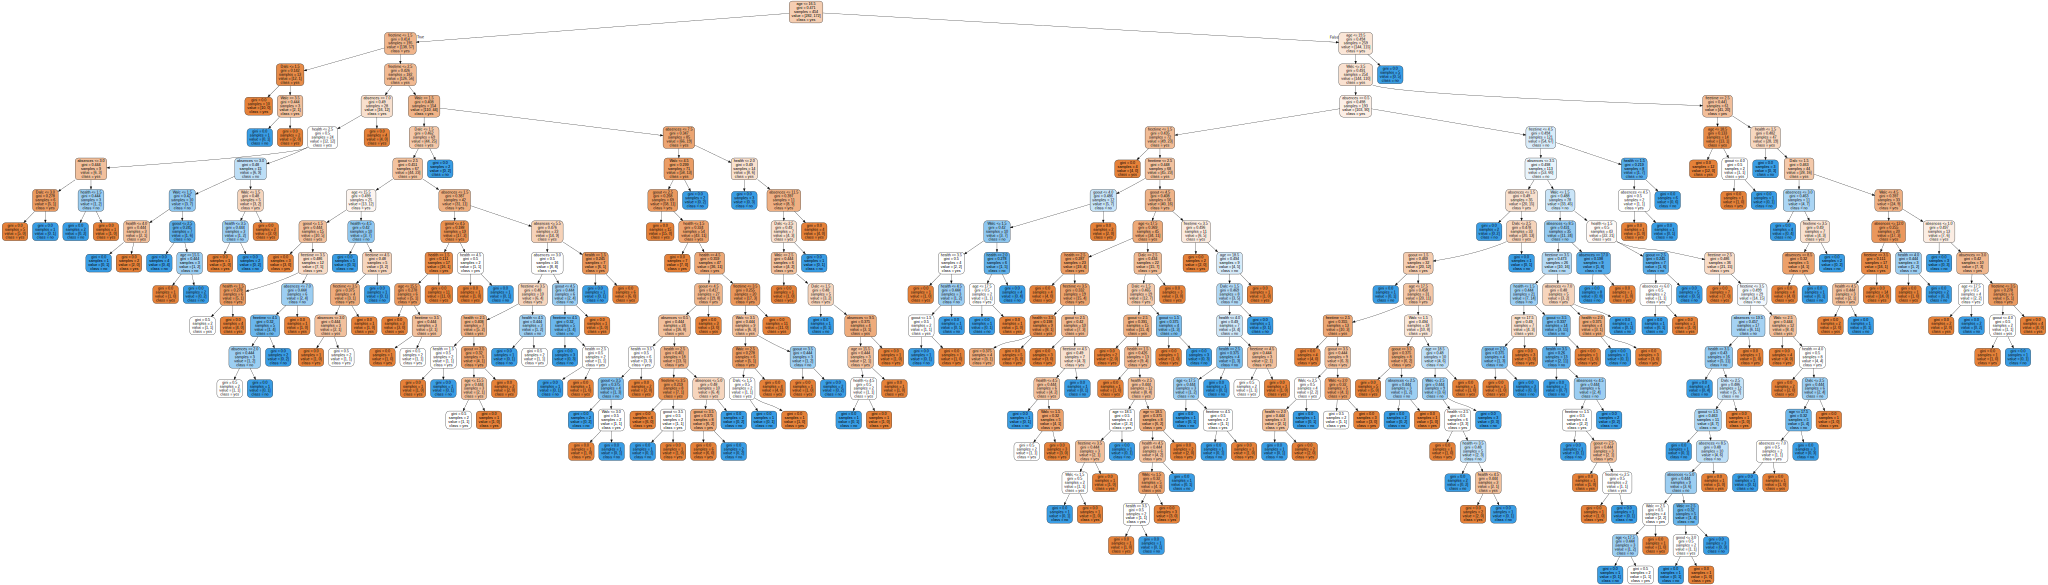

In [16]:
import graphviz
from sklearn.tree import export_graphviz

graph_data = export_graphviz(dtree, out_file=None,
                      feature_names=X.columns.values,
                      filled=True, rounded=True,
                      class_names=['yes', 'no'])

graph = graphviz.Source(graph_data)
graph 

In [13]:
# fist i had an error with graphviz, but now it works, but i already did random forest anyway: 

rf = RandomForestClassifier(random_state=1, n_estimators=100) 
rf = rf.fit(X_train, y_train)

In [14]:
y_pred = rf.predict(X_test) #the predicted values
cm = confusion_matrix(y_test, y_pred) #creates a "confusion matrix"
cm = pd.DataFrame(cm, index=['no romantic partner (actual)', 'romantic partner (actual)'], columns = ['no romantic partner (pred)', 'romantic partner (pred)']) #label and make df
cm

,no romantic partner (pred),romantic partner (pred)
no romantic partner (actual),97,31
romantic partner (actual),50,17


In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.66      0.76      0.71       128
         yes       0.35      0.25      0.30        67

    accuracy                           0.58       195
   macro avg       0.51      0.51      0.50       195
weighted avg       0.55      0.58      0.56       195



the precision is not very good. 35% of the suspects with random partners actually have romantic partners. the recall is even worse. Out of all the people with romantic parners, only 25% have been predicted to have a romantic partner. 